In [1]:
import pandas as pd
import networkx as nx
import numpy as np
from tqdm import tqdm
import itertools
import json
from collections import Counter
from multiprocessing import Pool
import matplotlib.pyplot as plt

In [2]:
folder="../dataset_v5/v5_2/v5_2_2/"
save_dir = "../graphs_v5_2_7_2/"

In [3]:
def map_ddc(ddc_code):
    mod_ddc_code = ''
    #print(ddc_code)
    if ddc_code:
        ddc_code = int(ddc_code)
        if ddc_code < 100:
            mod_ddc_code=0
        elif 100 <= ddc_code < 200:
            mod_ddc_code=100
        elif 200 <= ddc_code < 300:
            mod_ddc_code=200
        elif 300 <= ddc_code < 400:
            mod_ddc_code=300
        elif 400 <= ddc_code < 500:
            mod_ddc_code=400
        elif 500 <= ddc_code < 600:
            mod_ddc_code=500
        elif 600 <= ddc_code < 700:
            mod_ddc_code=600
        elif 700 <= ddc_code < 800:
            mod_ddc_code=700
        elif 800 <= ddc_code < 900:
            mod_ddc_code=800
        elif 900 <= ddc_code < 1000:
            mod_ddc_code=900
    return mod_ddc_code 

In [4]:
edges = pd.read_csv(folder+'final_shodhganga_dataset_v5_2_7_2.csv', sep =",")

In [5]:
nodes = pd.read_csv(folder+"index_file2_v5_2_7_2.csv")

In [6]:
nodes_inst = nodes.copy()
nodes_inst["inst"] = nodes['rid'].apply(lambda x : list(set(edges[(edges['advId']==x) | (edges['resId']==x)]['publisher_institution'].values))).copy()
nodes_inst_dict = dict(zip(nodes_inst['rid'], nodes_inst["inst"]))

In [7]:
edges1                = edges.copy()
edges1["ddc_code"]    = edges1["ddc_code"].apply(lambda x : eval(x)[-1] if len(eval(x))>0 else '').copy()
edges1['ddc_code']    = edges1['ddc_code'].apply(lambda x : map_ddc(x))
nodes_ddc             = nodes.copy()
nodes_ddc["ddc_code"] = nodes['rid'].apply(lambda x : list(set(edges1[(edges1['advId']==x) | (edges1['resId']==x)]['ddc_code'].values))).copy()
nodes_ddc_dict = dict(zip(nodes_ddc["rid"],nodes_ddc["ddc_code"]))

In [8]:
graph1 = nx.convert_matrix.from_pandas_edgelist(edges, 'advId','resId','publisher_institution', create_using=nx.DiGraph())
graph1.remove_edges_from(nx.selfloop_edges(graph1))
cycle=list(nx.simple_cycles(graph1))
graph1.remove_edges_from(cycle)

In [9]:
nx.set_node_attributes(graph1, values = nodes_inst_dict, name='institute')
nx.set_node_attributes(graph1, values = nodes_ddc_dict, name='ddc')

In [10]:
len(graph1.nodes())

256725

In [11]:
len(graph1.edges())

201250

In [12]:
components1 = list(nx.weakly_connected_components(graph1))

In [13]:
len(components1)

56935

In [14]:
components1.sort(key=len, reverse=True)

In [15]:
components1_Size=[len(c) for c in components1]

In [16]:
largest_comp = components1[0]
largest_sub_graph= graph1.subgraph(largest_comp)

In [17]:
len(largest_sub_graph.nodes())

1356

In [18]:
len(largest_sub_graph.edges())

1436

In [19]:
graph1.nodes[180228]

{'institute': ['Manonmaniam Sundaranar University'], 'ddc': [600]}

In [20]:
largest_sub_graph.nodes[180228]

{'institute': ['Manonmaniam Sundaranar University'], 'ddc': [600]}

In [21]:
inst = nx.get_node_attributes(largest_sub_graph, "institute")

In [22]:
inst = [inst for insts in inst.values() for inst in insts]

In [23]:
from collections import Counter

In [24]:
inst_count = Counter(inst)

In [25]:
inst_count.keys()

dict_keys(['Manonmaniam Sundaranar University', 'Bharathidasan University', 'Madurai Kamraj University', 'Alagappa University', 'Jawaharlal Nehru University', 'Sri Chandrasekharendra Saraswathi Viswa Mahavidyalaya', 'Assam University', 'Bharathiar University', 'Kalasalingam University', 'North-Eastern Hill University', 'University of Madras', 'Annamalai University', 'Maharshi Dayanand University', 'Panjab University', 'VIT University', 'Avinashilingam Deemed University For Women', 'Periyar University', 'Periyar Maniammai University', 'Tezpur University', 'Prist University'])

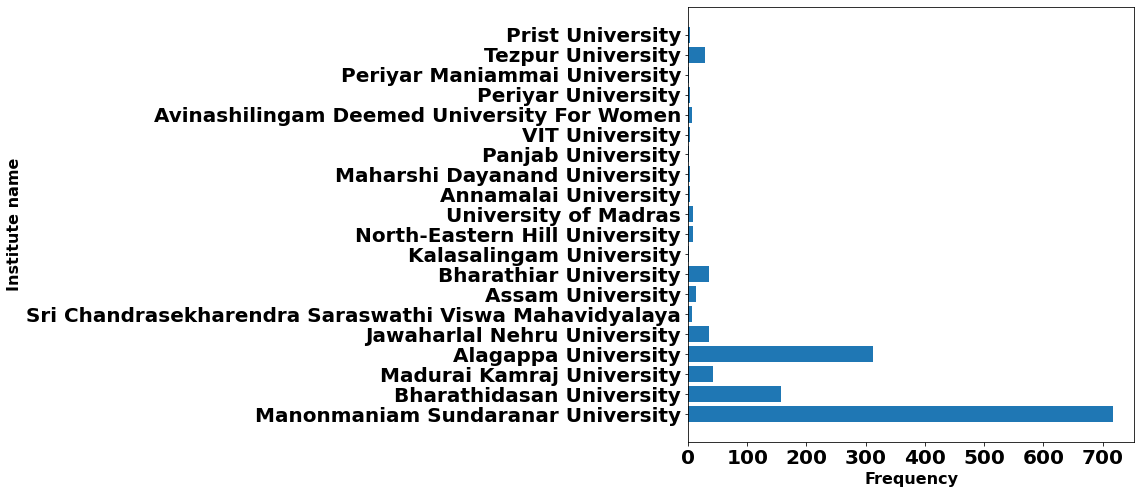

In [35]:
fig = plt.subplots(figsize =(8, 8))
plt.barh(list(inst_count.keys()), inst_count.values())
plt.xlabel('Frequency', fontweight ='bold', fontsize = 16)
plt.ylabel('Institute name', fontweight ='bold', fontsize = 16)
plt.yticks(weight = 'bold', fontsize = 20)
plt.xticks(weight = 'bold', fontsize = 20)
plt.savefig(save_dir+"inst_freq_in_largest_comp.pdf",bbox_inches='tight')
plt.show()

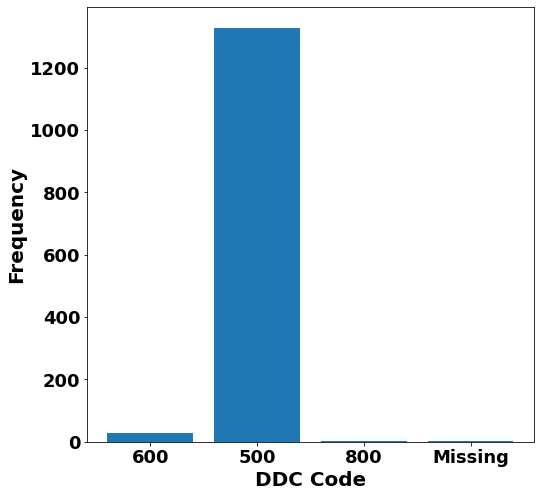

In [36]:
ddc_attr = nx.get_node_attributes(largest_sub_graph, "ddc")

ddc = [str(ddc) if ddc else "Missing" for ddcs in ddc_attr.values() for ddc in ddcs ]

from collections import Counter

ddc_count = Counter(ddc)

fig = plt.subplots(figsize =(8, 8))
plt.xticks(fontsize = 18, weight = 'bold')
plt.yticks(fontsize = 18, weight = 'bold')
plt.bar(ddc_count.keys(), ddc_count.values())
plt.xlabel('DDC Code', fontweight ='bold', fontsize = 20)
plt.ylabel('Frequency', fontweight ='bold', fontsize = 20)
plt.savefig(save_dir+"ddc_freq_in_largest_comp.pdf",bbox_inches='tight')
plt.show()

In [41]:
ddc_count

Counter({'600': 27, '500': 1329, '800': 3, 'Missing': 3})

In [28]:
deg = largest_sub_graph.degree()

In [30]:
sorted_deg = sorted(deg, key=lambda x : x[1],reverse=True)

In [31]:
sorted_deg

[(53252, 44),
 (32005, 30),
 (53248, 28),
 (53259, 27),
 (16402, 23),
 (31972, 23),
 (50054, 22),
 (16467, 21),
 (69102, 21),
 (53250, 21),
 (53387, 21),
 (31867, 21),
 (53254, 18),
 (72375, 18),
 (50076, 17),
 (166527, 17),
 (199337, 17),
 (31866, 17),
 (195714, 17),
 (53249, 16),
 (51871, 16),
 (64449, 16),
 (31859, 16),
 (31742, 15),
 (31858, 15),
 (43101, 14),
 (31748, 14),
 (72811, 14),
 (53371, 13),
 (53257, 12),
 (53382, 12),
 (53383, 12),
 (70001, 12),
 (86772, 12),
 (63985, 12),
 (31743, 12),
 (31940, 12),
 (31942, 12),
 (50085, 11),
 (43068, 11),
 (166454, 11),
 (36631, 11),
 (46830, 11),
 (31751, 11),
 (31763, 11),
 (31869, 11),
 (31986, 11),
 (43084, 10),
 (70006, 10),
 (46828, 10),
 (219638, 10),
 (228304, 10),
 (195682, 10),
 (31873, 10),
 (32084, 10),
 (199340, 9),
 (36628, 9),
 (31985, 9),
 (43071, 8),
 (53267, 8),
 (14829, 8),
 (64348, 8),
 (31982, 8),
 (31989, 8),
 (43091, 7),
 (198998, 7),
 (166493, 7),
 (158349, 7),
 (53270, 7),
 (53373, 7),
 (64476, 7),
 (31754, 7)

In [32]:
edges[edges['advId']==53252]

,advisorId,researcherId,advId,resId,advisor_name,researcher_name,publisher_dept,DepartmentId,publisher_institution,instituteId,...,new_date_awarded,dc.date.awarded,dc.subject.ddc,uniq_ddc_across_dept,dc.description.abstract,dc.title.alternative,N_DepartmentId_1,ddc_code,advisor_advId,researcher_resId
111684,53252,199071,53252,53249,"Vasudevan, T.","Subramanian, A.",department of industrial chemistry,D1888,Alagappa University,I333,...,1998-07-01,NaN,500::Natural sciences & mathematics|540::Chemi...,"('500', '540')",NaN,NaN,D1888,"('500', '540')","Vasudevan, T.@53252","Subramanian, A.@53249"
111685,53252,53267,53252,53267,"Vasudevan, T.","Muralidharan, B.",department of industrial chemistry,D1888,Alagappa University,I333,...,1996-07-01,NaN,500::Natural sciences & mathematics|540::Chemi...,"('500', '540')",NaN,NaN,D1888,"('500', '540')","Vasudevan, T.@53252","Muralidharan, B.@53267"
111686,53252,198907,53252,198907,"Vasudevan, T.","Indumathi, SN",department of chemistry,D1888,Alagappa University,I333,...,2012-07-20,2012-07-20,500::Natural sciences & mathematics|540::Chemi...,"('500', '540')",NaN,NaN,D1331,"('500', '540')","Vasudevan, T.@53252","Indumathi, SN@198907"
111687,53252,198971,53252,198971,"Vasudevan, T.","Shakkthivel, P.",department of industrial chemistry,D1888,Alagappa University,I333,...,2000-07-01,NaN,500::Natural sciences & mathematics|540::Chemi...,"('500', '540')",NaN,NaN,D1888,"('500', '540')","Vasudevan, T.@53252","Shakkthivel, P.@198971"
111688,53252,198972,53252,198972,"Vasudevan, T.","Srinivasan, R.",department of industrial chemistry,D1888,Alagappa University,I333,...,2007-07-01,NaN,500::Natural sciences & mathematics|540::Chemi...,"('500', '540')",NaN,NaN,D1888,"('500', '540')","Vasudevan, T.@53252","Srinivasan, R.@198972"
111689,53252,198979,53252,198979,"Vasudevan, T.","Lajapathi Rai, C.",department of industrial chemistry,D1888,Alagappa University,I333,...,2007-07-01,NaN,500::Natural sciences & mathematics|540::Chemi...,"('500', '540')",NaN,NaN,D1888,"('500', '540')","Vasudevan, T.@53252","Lajapathi Rai, C.@198979"
111690,53252,198980,53252,198980,"Vasudevan, T.","Umamaheswari, S.",department of industrial chemistry,D1888,Alagappa University,I333,...,2000-07-01,NaN,500::Natural sciences & mathematics|540::Chemi...,"('500', '540')",NaN,NaN,D1888,"('500', '540')","Vasudevan, T.@53252","Umamaheswari, S.@198980"
111691,53252,198983,53252,198983,"Vasudevan, T.","Venkataraman, S.",department of industrial chemistry,D1888,Alagappa University,I333,...,2005-07-01,NaN,500::Natural sciences & mathematics|540::Chemi...,"('500', '540')",NaN,NaN,D1888,"('500', '540')","Vasudevan, T.@53252","Venkataraman, S.@198983"
111692,53252,198985,53252,198985,"Vasudevan, T.","Sathiya Narayanan, R.",department of industrial chemistry,D1888,Alagappa University,I333,...,2004-07-01,NaN,500::Natural sciences & mathematics|540::Chemi...,"('500', '540')",NaN,NaN,D1888,"('500', '540')","Vasudevan, T.@53252","Sathiya Narayanan, R.@198985"
111693,53252,198991,53252,198991,"Vasudevan, T.","Ramesh, D.",department of industrial chemistry,D1888,Alagappa University,I333,...,2004-07-01,NaN,500::Natural sciences & mathematics|540::Chemi...,"('500', '540')",NaN,NaN,D1888,"('500', '540')","Vasudevan, T.@53252","Ramesh, D.@198991"


In [42]:
edges[edges['resId']==53252]

,advisorId,researcherId,advId,resId,advisor_name,researcher_name,publisher_dept,DepartmentId,publisher_institution,instituteId,...,new_date_awarded,dc.date.awarded,dc.subject.ddc,uniq_ddc_across_dept,dc.description.abstract,dc.title.alternative,N_DepartmentId_1,ddc_code,advisor_advId,researcher_resId


In [44]:
largest_edges = edges[(edges['resId'].isin(largest_comp) & edges['advId'].isin(largest_comp))]

In [53]:
largest_edges[['advId','new_date_awarded']]['new_date_awarded'].dropna().min()

'1979-07-01'

In [54]:
largest_edges[largest_edges['new_date_awarded']=='1979-07-01']

,advisorId,researcherId,advId,resId,advisor_name,researcher_name,publisher_dept,DepartmentId,publisher_institution,instituteId,...,new_date_awarded,dc.date.awarded,dc.subject.ddc,uniq_ddc_across_dept,dc.description.abstract,dc.title.alternative,N_DepartmentId_1,ddc_code,advisor_advId,researcher_resId
146284,70030,232581,70006,232581,"Rao, Ramesha","Elango, N.",school of life sciences,D738,Jawaharlal Nehru University,I85,...,1979-07-01,NaN,500::Natural sciences & mathematics|570::Life ...,"('500', '570')",NaN,NaN,D738,"('500', '570')","Rao, Ramesha@70006","Elango, N.@232581"


In [56]:
len(nx.descendants(largest_sub_graph,53252))

75